## Part III: Analyzing an A/B test - “Pay to Play” test

#### Dataset Overview
- Revenue-related fields: `fs_revenue, iap_revenue, ad_revenue, rv_revenue`
- Engagement metrics: `fs_watched, rv_watched, game_count, session_length, session_number`
- User/device metadata: `country, platform, manufacturer, model`
- A/B test tracking: `ab_test_name, cohort_name, assigned_at`<br/>
The field `cohort_name` distinguishes players in the Pay to Play Cohort vs Control.

---

#### a) Why do you think the game team decided to run this experiment?


The goal is to test if this feature **increases monetization** through higher **in-app purchases (IAP)** and rewarded videos (RV).  The monetisation hypothesis is by charging 20 coins to start a level and doubling the win‑reward (40 coins) the team hoped to:

- burn the large free‑coin balances that accumulate in casual games,
- push coin‑poor but highly‑engaged players toward in‑app purchases (IAP) when they run out,
- make “wins” feel more valuable and therefore more “spend‑worthy.”
- as player can collect 60 coins every 4h for free they may protentially stay longer.

However we need to pay attention : putting a price on each attempt might discourage users and can lead to a higher churn rate.

---

#### b) What would you define as the primary success metric for this test?

Because the experiment explicitly tries to trade engagement for more money, the north‑star metric should be average revenue per user (ARPU / ARPDAU), but we also need engagement metrics to support so that we do not buy revenue at the cost of unacceptable churn.


**Primary Metric:** Total revenue per user/session = fs_revenue + iap_revenue + ad_revenue + rv_revenue

**Supporting Metrics:** Average Session Length, Game Count per Session, Retention rate 

---

#### c) Is there a clear winner? Why or why not?

| Cohort          | Avg. Total Revenue/Session | Avg. Session Length (sec) | Avg. Games/Session | Unique Users |
| --------------- | -------------------------- | ------------------------- | ------------------ | ------------ |
| **Control**     | 0.1037                     | 620.5                     | 6.19               | 5,782        |
| **Pay to Play** | 0.1055                     | 628.0                     | 6.01               | 5,555        |


There is no clear, significant winner. The differences in metrics are minimal:

- Revenue gain is marginal and may not justify potential Revenue increase.
- Engagement trade-off (longer sessions but fewer games) suggests a behavioral shift, not necessarily more value.


![show image of analysis](winner.png)

#### d) What are your business recommendations for the game manager based on your findings?

I would suggest no to use the pay to play methanic, since it doesn't change much the revenue, but decreases the customer retention rate

**According to the retention rate over time analysis:** (Chart attached below) 
- Control cohort retains users better across all days.
- Day 1 to Day 3 drop is sharper in the Pay to Play cohort, suggesting early deterrence.
- By Day 6, retention drops to ~7.2% (Control) vs ~5.7% (Pay to Play) — a ~21% relative drop.

The Pay to Play mechanic negatively impacts retention, particularly in the early lifecycle of the user. 


![Retention rate over time by cohort](retention.png)

If we decide to keep this pay to play mechanic, then here are some suggestions to refine it.

**Refine the Pay to Play mechanic:**

- Offer soft landings: Try lowering the cost or introducing free daily retries to ease friction. We can also add pity‑timer refunds, or “loan coins” to avoid frustration spirals.

- Segment analysis: High spenders might respond better to “Pay to Play” than casual players. A targeted strategy might yield better returns.

- Enhance reward appeal: Boost the emotional or visual feedback of winning to increase the perceived value of risking coins.

--- 

#### e) Do you have suggestions for future iterations or improvements?

1, Try pay to play or other similar monetization mechanic to **High level** or **Hight Spend** users instead of all users. Later levels correlate with higher willingness‑to‑pay, and can avoid early stage churn. In both Cohort groups, High Spenders account only 1/4, but they generate more than 80% of revenues. 

| Cohort          | Low Spenders | Mid Spenders | High Spenders |
| --------------- | ------------ | ------------ | ------------- |
| **Control**     | 2,834        | 1,433        | 1,515         |
| **Pay to Play** | 2,786        | 1,446        | 1,320         |

![revenue by cohort and segmentation](revenue.png)

# Appendix
Data and code for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1, Data clean and Data validation 

In [2]:
# Load dataset
game = pd.read_csv('Game.csv')
game.head()

,country,first_app_launch_date,fs_revenue,fs_watched,game_count,iap_revenue,iap_transactions,install_store,manufacturer,model,...,ad_revenue,rv_revenue,rv_watched,session_id,session_length,session_number,user_id,assigned_at,ab_test_name,cohort_name
0,US,2025-04-23T16:18:53.000Z,0.533038,4,12,2.490000,1,NaN,Apple,iPhone14ProMax,...,0.533038,NaN,0,1f507723-1882-47d3-8d42-ac43e98a0b67,2238,7,199782a9-5579-49b2-90fa-e24d653852ce,2025-04-23 16:19:03,v8.2 - Pay to Play Test,Pay to Play Cohort
1,SE,2025-02-14T16:44:53.000Z,NaN,0,8,3.021164,1,NaN,Apple,iPhone12,...,0.000000,NaN,0,5312b7a6-1dbe-4762-8671-e2f8a54896bd,906,103,2c7a79f5-3ccd-4e17-aa3d-c5663eaeaf66,2025-04-23 17:28:10,v8.2 - Pay to Play Test,Control
2,SE,2025-02-14T16:44:53.000Z,0.053265,5,24,11.978393,4,NaN,Apple,iPhone12,...,0.065425,0.01216,2,f4cceba2-22fe-483c-b488-dcfed046ecea,2435,101,2c7a79f5-3ccd-4e17-aa3d-c5663eaeaf66,2025-04-23 17:28:10,v8.2 - Pay to Play Test,Control
3,US,2025-02-02T04:04:52.000Z,NaN,0,4,14.990000,1,NaN,Apple,iPhone14,...,0.000000,NaN,0,c9c7acc8-42fe-442b-b202-9ac9bc8fc63c,1022,224,3d2c799f-0d53-473b-a0fd-7482700d2301,2025-04-24 03:52:46,v8.2 - Pay to Play Test,Control
4,DK,2025-03-21T16:38:54.000Z,NaN,0,1,7.459047,1,NaN,Apple,iPhone15ProMax,...,0.000000,NaN,0,75268309-660f-4c36-9381-1b7e3b2e326d,101,176,771cf3cc-daf0-4994-9b48-b1869a0cd168,2025-04-23 19:22:40,v8.2 - Pay to Play Test,Pay to Play Cohort


In [3]:
# data overview
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99936 entries, 0 to 99935
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                99924 non-null  object 
 1   first_app_launch_date  99820 non-null  object 
 2   fs_revenue             42509 non-null  float64
 3   fs_watched             99936 non-null  int64  
 4   game_count             99936 non-null  int64  
 5   iap_revenue            99936 non-null  float64
 6   iap_transactions       99936 non-null  int64  
 7   install_store          0 non-null      float64
 8   manufacturer           99936 non-null  object 
 9   model                  99936 non-null  object 
 10  open_at                99936 non-null  object 
 11  platform               99936 non-null  object 
 12  ad_revenue             99936 non-null  float64
 13  rv_revenue             7515 non-null   float64
 14  rv_watched             99936 non-null  int64  
 15  se

In [4]:
# check missing values
game.isna().sum()

country                     12
first_app_launch_date      116
fs_revenue               57427
fs_watched                   0
game_count                   0
iap_revenue                  0
iap_transactions             0
install_store            99936
manufacturer                 0
model                        0
open_at                      0
platform                     0
ad_revenue                   0
rv_revenue               92421
rv_watched                   0
session_id                   0
session_length               0
session_number               0
user_id                      0
assigned_at                  0
ab_test_name                 0
cohort_name                  0
dtype: int64

In [5]:
# install_store has no value, this column will be dropped.
game.drop(columns=['install_store'],inplace=True)
# fs_revenue, rv_revenue have a lot of null values, but it's logic, we will fill null values with 0.
game['fs_revenue'].fillna(0,inplace=True)
game['rv_revenue'].fillna(0, inplace=True)

### 2, Data Analysis

#### a. Cohort performance analysis. 
- Computes total revenue per session,
- Groups the data by cohort,
- Computes mean values and visualizes them using bar plots.

In [6]:
# Calculate total revenue per session
game['total_revenue'] = game[['fs_revenue', 'iap_revenue', 'ad_revenue', 'rv_revenue']].sum(axis=1)

# Aggregate metrics by cohort
cohort_summary = game.groupby('cohort_name').agg({
    'total_revenue': 'mean',
    'session_length': 'mean',
    'game_count': 'mean',
    'user_id': pd.Series.nunique
}).rename(columns={'user_id': 'unique_users'}).reset_index()

In [7]:
cohort_summary.round(2)

,cohort_name,total_revenue,session_length,game_count,unique_users
0,Control,0.10,620.51,6.19,5782
1,Pay to Play Cohort,0.11,628.03,6.01,5555


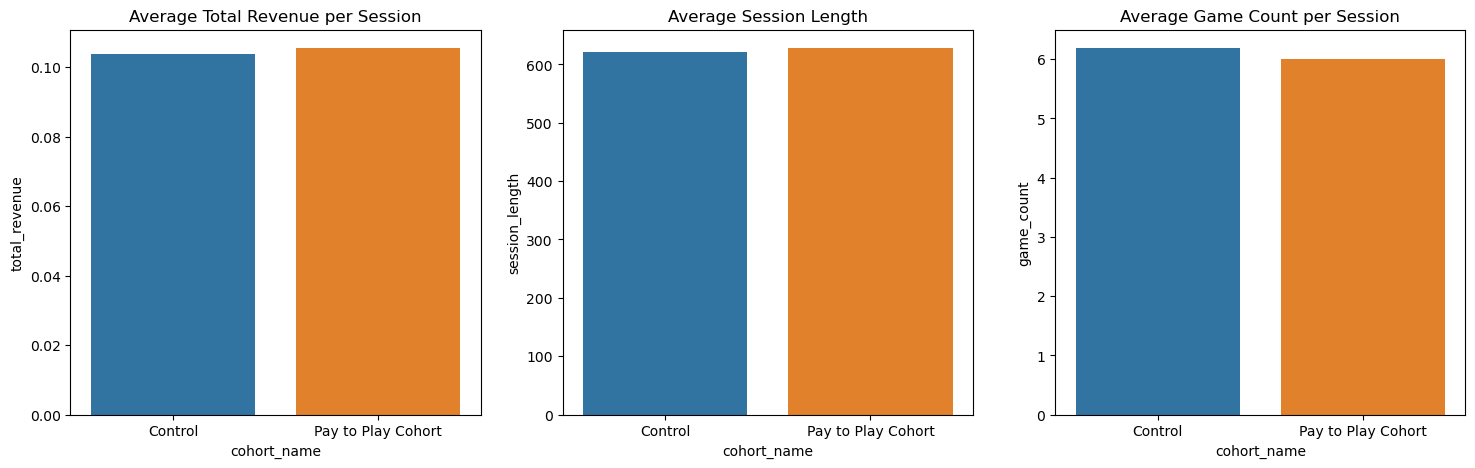

In [8]:
# Visualizing key performance indicators
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar plot for average total revenue per session
sns.barplot(x='cohort_name', y='total_revenue', data=cohort_summary, ax=axes[0])
axes[0].set_title('Average Total Revenue per Session')

# Bar plot for average session length
sns.barplot(x='cohort_name', y='session_length', data=cohort_summary, ax=axes[1])
axes[1].set_title('Average Session Length')

# Bar plot for average game count
sns.barplot(x='cohort_name', y='game_count', data=cohort_summary, ax=axes[2])
axes[2].set_title('Average Game Count per Session')

plt.show()


#### b. User retention over time by cohort

In [9]:
# Convert session timestamps to datetime
game['open_at'] = pd.to_datetime(game['open_at'])

# Determine first session per user
first_session = game.groupby('user_id')['open_at'].min().reset_index()
first_session.columns = ['user_id', 'first_session']

first_session

,user_id,first_session
0,0002f61e-4eba-4637-b4b7-f6cc0218914b,2025-04-27 06:35:36
1,00037dda-1de9-46f2-8ad3-c7df204e4a85,2025-04-23 21:19:27
2,00082aed-27cb-4978-96bc-ad009030a6d8,2025-04-27 05:47:13
3,000936ad-aaeb-4ddb-a5fa-6d55ed9886e8,2025-04-29 21:21:35
4,000d9d91-13d4-4d27-bc6a-5bd5be048e6a,2025-04-28 11:46:56
...,...,...
11331,ffe9b076-1512-4dc3-be8a-fdd6f7003e25,2025-04-25 15:34:27
11332,fff05fa7-16e2-4d4f-a66f-acba28db0c9f,2025-04-27 15:05:05
11333,fff06099-4efa-48d9-9a9f-17b79df0efcb,2025-04-24 02:58:52
11334,fff43ad4-2a5d-4e6c-82fa-c168f926cc7a,2025-04-26 18:19:11


In [10]:
# Merge to calculate days since first session
game_merge = game.merge(first_session, on='user_id')
game_merge['days_since_first'] = (game_merge['open_at'] - game_merge['first_session']).dt.days

# Count users returning each day by cohort
retention = game_merge.groupby(['cohort_name', 'days_since_first'])['user_id'].nunique().reset_index()
retention

,cohort_name,days_since_first,user_id
0,Control,0,5782
1,Control,1,2183
2,Control,2,1860
3,Control,3,1544
4,Control,4,1348
5,Control,5,1046
6,Control,6,414
7,Pay to Play Cohort,0,5555
8,Pay to Play Cohort,1,1997
9,Pay to Play Cohort,2,1583


In [11]:
# Get initial user count for each cohort (day 0)
initial_users = game_merge[game_merge['days_since_first'] == 0].groupby('cohort_name')['user_id'].nunique().to_dict()
initial_users

{'Control': 5782, 'Pay to Play Cohort': 5555}

In [12]:
# Calculate retention rates
retention['retention_rate'] = retention.apply(
    lambda row: row['user_id'] / initial_users[row['cohort_name']], axis=1)
retention

,cohort_name,days_since_first,user_id,retention_rate
0,Control,0,5782,1.000000
1,Control,1,2183,0.377551
2,Control,2,1860,0.321688
3,Control,3,1544,0.267036
4,Control,4,1348,0.233137
5,Control,5,1046,0.180906
6,Control,6,414,0.071602
7,Pay to Play Cohort,0,5555,1.000000
8,Pay to Play Cohort,1,1997,0.359496
9,Pay to Play Cohort,2,1583,0.284968


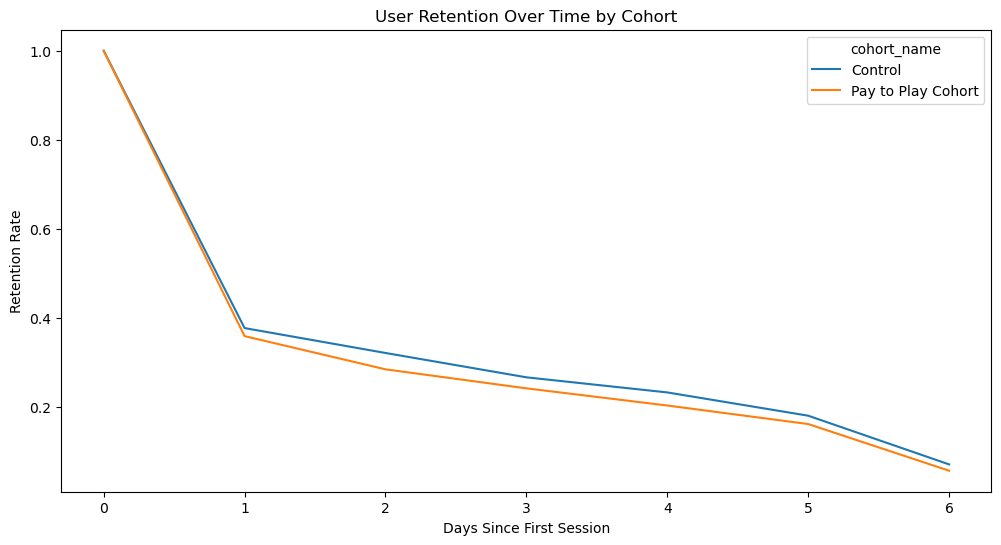

In [13]:
# Plot retention curves
plt.figure(figsize=(12, 6))
sns.lineplot(data=retention, x='days_since_first', y='retention_rate', hue='cohort_name')
plt.title('User Retention Over Time by Cohort')
plt.xlabel('Days Since First Session')
plt.ylabel('Retention Rate')
plt.show()

**Key Findings:** 
- Control cohort retains users better across all days.
- Day 1 to Day 3 drop is sharper in the Pay to Play cohort, suggesting early deterrence.
- By Day 6, retention drops to ~7.2% (Control) vs ~5.7% (Pay to Play) — a ~21% relative drop.

The Pay to Play mechanic negatively impacts retention, particularly in the early lifecycle of the user. This may be due to:
- Increased friction (cost to play),
- Inadequate perceived value of rewards,
- Lack of early incentives or guidance.

#### C. Revenue per User Segmentation (Low vs High Spenders)

In [17]:
# Calculate total revenue per user
user_revenue = game.groupby(['user_id', 'cohort_name'])['total_revenue'].sum().reset_index()
user_revenue

,user_id,cohort_name,total_revenue
0,0002f61e-4eba-4637-b4b7-f6cc0218914b,Control,0.083176
1,00037dda-1de9-46f2-8ad3-c7df204e4a85,Pay to Play Cohort,0.192069
2,00082aed-27cb-4978-96bc-ad009030a6d8,Pay to Play Cohort,0.000000
3,000936ad-aaeb-4ddb-a5fa-6d55ed9886e8,Control,0.000000
4,000d9d91-13d4-4d27-bc6a-5bd5be048e6a,Pay to Play Cohort,0.000000
...,...,...,...
11332,ffe9b076-1512-4dc3-be8a-fdd6f7003e25,Pay to Play Cohort,0.000000
11333,fff05fa7-16e2-4d4f-a66f-acba28db0c9f,Pay to Play Cohort,0.351101
11334,fff06099-4efa-48d9-9a9f-17b79df0efcb,Pay to Play Cohort,0.085115
11335,fff43ad4-2a5d-4e6c-82fa-c168f926cc7a,Pay to Play Cohort,0.186303


In [18]:
# Define revenue quantiles to classify spend segments
quantiles = user_revenue['total_revenue'].quantile([0.25, 0.75])
print(quantiles)
low_threshold = quantiles.iloc[0]
high_threshold = quantiles.iloc[1]
print(low_threshold,high_threshold)

0.25    0.000000
0.75    0.216849
Name: total_revenue, dtype: float64
0.0 0.2168489214324952


In [19]:
# Define spend segment function
def segment_revenue(x):
    if x <= low_threshold:
        return 'Low Spender'
    elif x >= high_threshold:
        return 'High Spender'
    else:
        return 'Mid Spender'

user_revenue['spend_segment'] = user_revenue['total_revenue'].apply(segment_revenue)
user_revenue.head()

,user_id,cohort_name,total_revenue,spend_segment
0,0002f61e-4eba-4637-b4b7-f6cc0218914b,Control,0.083176,Mid Spender
1,00037dda-1de9-46f2-8ad3-c7df204e4a85,Pay to Play Cohort,0.192069,Mid Spender
2,00082aed-27cb-4978-96bc-ad009030a6d8,Pay to Play Cohort,0.000000,Low Spender
3,000936ad-aaeb-4ddb-a5fa-6d55ed9886e8,Control,0.000000,Low Spender
4,000d9d91-13d4-4d27-bc6a-5bd5be048e6a,Pay to Play Cohort,0.000000,Low Spender


In [25]:
# Count users in each segment by cohort
segment_distribution = user_revenue.groupby(['cohort_name', 'spend_segment']).agg({'user_id': 'count', 'total_revenue':'sum'}).reset_index()
segment_distribution = segment_distribution.rename(columns={'user_id': 'user_count'})
segment_distribution

,cohort_name,spend_segment,user_count,total_revenue
0,Control,High Spender,1515,5610.335076
1,Control,Low Spender,2834,0.000000
2,Control,Mid Spender,1433,121.250964
3,Pay to Play Cohort,High Spender,1320,4599.989033
4,Pay to Play Cohort,Low Spender,2786,0.000000
5,Pay to Play Cohort,Mid Spender,1449,114.009829


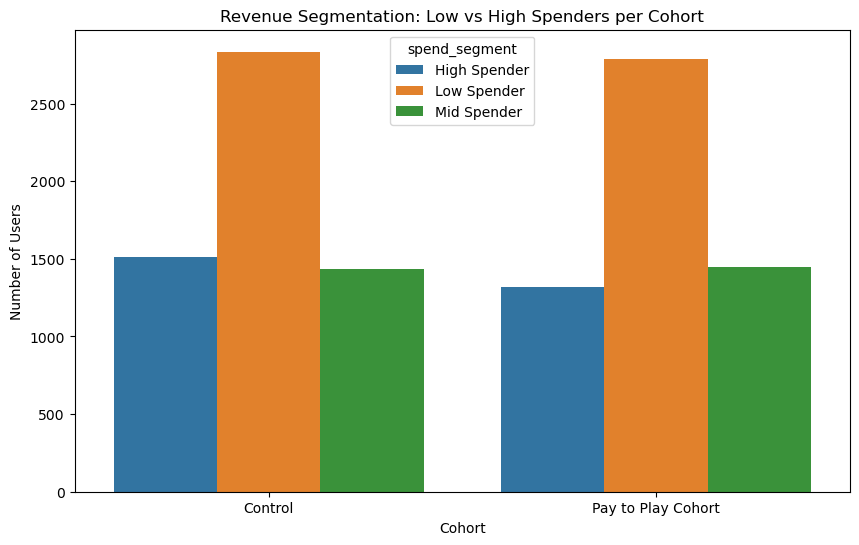

In [ ]:
# visualisation for users
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_distribution, x='cohort_name', y='user_count', hue='spend_segment')
plt.title('Revenue Segmentation: Low vs High Spenders per Cohort')
plt.ylabel('Number of Users')
plt.xlabel('Cohort')
plt.show()

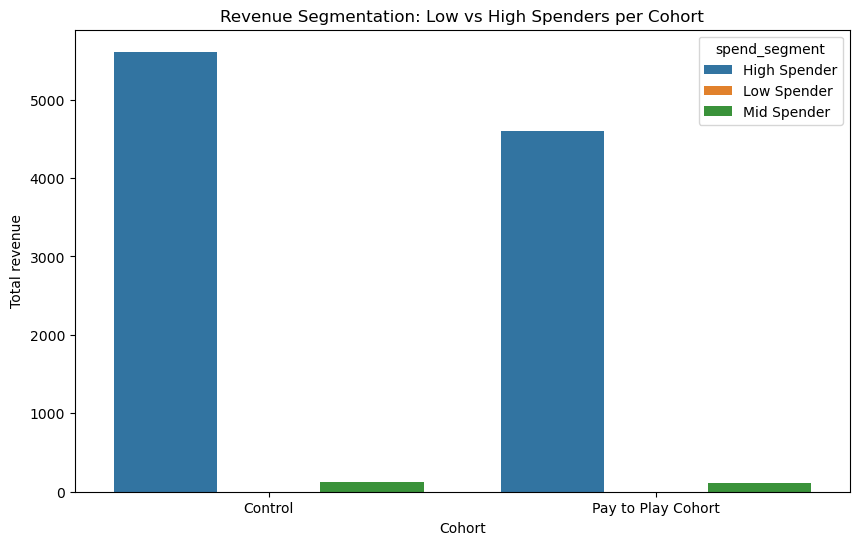

In [27]:
# visualisation for revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_distribution, x='cohort_name', y='total_revenue', hue='spend_segment')
plt.title('Revenue Segmentation: Low vs High Spenders per Cohort')
plt.ylabel('Total revenue')
plt.xlabel('Cohort')
plt.show()

#### d. Purchase conversion funnel (views → revenue) analysis
This analysis examines how effectively users convert from ad views or purchase events into actual revenue.

In [14]:
# Funnel analysis for FS and IAP conversion
funnel = game.groupby('cohort_name').agg({
    'fs_watched': 'sum',
    'fs_revenue': 'sum',
    'iap_transactions': 'sum',
    'iap_revenue': 'sum'
}).reset_index()


funnel['fs_conversion_rate'] = funnel['fs_revenue'] / funnel['fs_watched']
funnel['iap_conversion_rate'] = funnel['iap_revenue'] / funnel['iap_transactions']
funnel

,cohort_name,fs_watched,fs_revenue,iap_transactions,iap_revenue,fs_conversion_rate,iap_conversion_rate
0,Control,70128,957.351323,483,3289.273239,0.013651,6.810090
1,Pay to Play Cohort,51967,705.476205,344,2674.975719,0.013575,7.776092


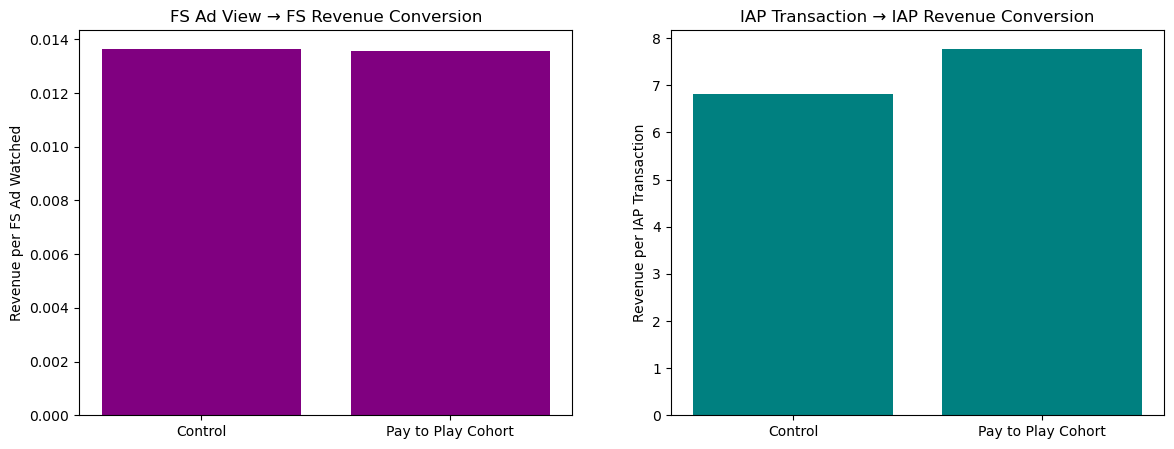

In [15]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(funnel['cohort_name'], funnel['fs_conversion_rate'], color='purple')
axes[0].set_title('FS Ad View → FS Revenue Conversion')
axes[0].set_ylabel('Revenue per FS Ad Watched')

axes[1].bar(funnel['cohort_name'], funnel['iap_conversion_rate'], color='teal')
axes[1].set_title('IAP Transaction → IAP Revenue Conversion')
axes[1].set_ylabel('Revenue per IAP Transaction')


plt.show()

key findings: 

- First-time purchase ad conversion (FS Ad → Revenue) is nearly identical in both cohorts.
- In-App Purchase conversion rate is higher in the Pay to Play cohort (7.78 vs 6.81), suggesting: 1) Players in this cohort might be more motivated to make purchases. 2) The mechanic may be convincing users toward higher-value transactions.